<p style="text-align: center"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read data from file

In [145]:
df = pd.read_csv("adult_eda1.csv")

# Try to undersstand what the data looks like? What are types of the features? Are there any missing values? Do I need to eliminate some features?  

In [114]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [115]:
df.shape

(32561, 15)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [117]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,31759.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.082843,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.576172,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [118]:
df.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num      802
marital-status       0
occupation           0
relationship      5068
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

---
---

# Look at the value counts of columns that have object datatype and replace '?' like values with 'Unknown' word.  

In [119]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32561,32561,32561,32561,27493,32561,32561,32561,32561
unique,9,16,7,15,5,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [11]:
#look at workclass column here
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [125]:
df = df[df.workclass == '?']
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
27,54,?,180211,Some-college,10.0,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4.0,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10.0,Never-married,?,NaN,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6.0,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6.0,Never-married,?,NaN,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13.0,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13.0,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,NaN,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9.0,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [14]:
#replace all '?' in whole df with 'Unknown'


In [129]:
df.workclass = df.workclass.str.replace(r"?", "Unknown", regex=True)
df.workclass.value_counts()

Unknown    1836
Name: workclass, dtype: int64

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [127]:
df[df.isin(['?'])].head().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
salary            False
dtype: bool

In [15]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9.0,Never-married,Adm-clerical,NaN,White,Male,0,0,20,United-States,<=50K


---
---

# Do education and education_num columns hold similar information? If so drop the appropriate choice between them.

In [33]:
df.education

0         Bachelors
1         Bachelors
2           HS-grad
3              11th
4         Bachelors
            ...    
32556    Assoc-acdm
32557       HS-grad
32558       HS-grad
32559       HS-grad
32560       HS-grad
Name: education, Length: 32561, dtype: object

In [35]:
df['education-num']

0        13.0
1        13.0
2         9.0
3         7.0
4        13.0
         ... 
32556    12.0
32557     9.0
32558     9.0
32559     9.0
32560     9.0
Name: education-num, Length: 32561, dtype: float64

In [88]:
df[['education', 'education-num']].value_counts().sort_index()

education     education-num
10th          6.0                916
11th          7.0               1146
12th          8.0                424
1st-4th       2.0                161
5th-6th       3.0                330
7th-8th       4.0                631
9th           5.0                503
Assoc-acdm    12.0              1044
Assoc-voc     11.0              1343
Bachelors     13.0              5247
Doctorate     16.0               405
HS-grad       9.0              10215
Masters       14.0              1687
Preschool     1.0                 50
Prof-school   15.0               559
Some-college  10.0              7098
dtype: int64

In [135]:
df['education-num'].value_counts()

9.0     514
10.0    505
13.0    169
7.0     117
6.0      99
4.0      69
11.0     57
5.0      51
14.0     48
12.0     46
8.0      39
3.0      30
15.0     18
16.0     14
2.0      12
1.0       5
Name: education-num, dtype: int64

In [82]:
#drop one of them here
df4 = df.drop(columns='education-num')

In [83]:
df4.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
marital-status       0
occupation           0
relationship      5068
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

---
---

# Take a look at correlation between variables and also see if there are some outliers in any of the columns.

In [85]:
df4.corr()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,0.000432,-0.010252,-0.018768
capital-gain,0.077674,0.000432,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.078409,0.054256,1.000000


In [86]:
df4.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000


In [103]:
#age column
IQR = np.percentile(df.age, 75) - np.percentile(df.age, 25)
IQR

20.0

In [110]:
upper_lim = np.percentile(df.age, 75) + (IQR * 1.5)
upper_lim

78.0

In [146]:
df[df["age"] >= upper_lim]['age'].value_counts()

90    43
78    23
79    22
80    22
81    20
82    12
84    10
83     6
88     3
85     3
86     1
87     1
Name: age, dtype: int64

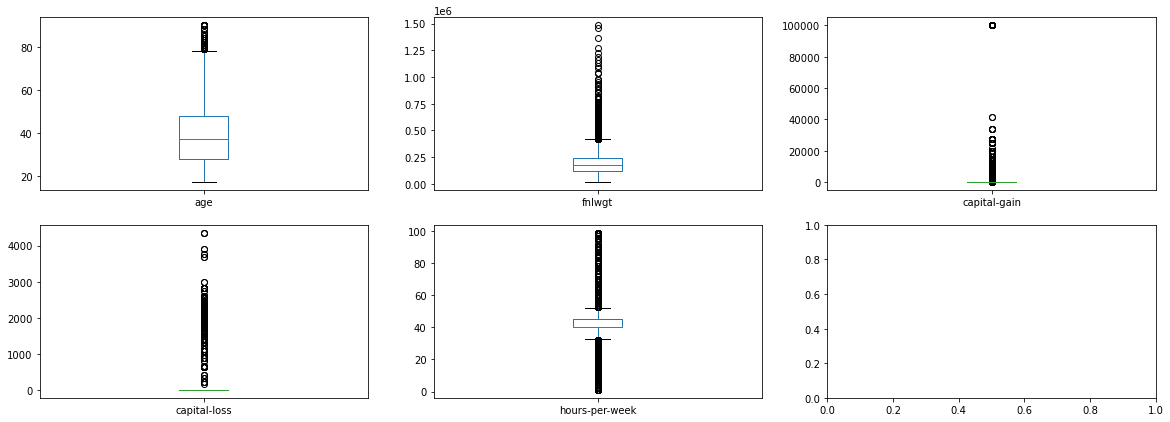

In [28]:
fig ,ax = plt.subplots(2,3,figsize=(20,7))
x = 0
y = 0
for column in df.select_dtypes('number').columns:
    
    df[column].plot(kind = "box", ax = ax[x,y])
    if y < 2:
        y += 1
    else:
        x += 1
        y = 0

In [147]:
df[(df["hours-per-week"] == 99)].sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
30992,40,Self-emp-inc,104235,Masters,14.0,Never-married,Other-service,NaN,White,Male,0,0,99,United-States,<=50K
8654,30,Private,103596,HS-grad,9.0,Never-married,Protective-serv,Not-in-family,White,Male,0,0,99,United-States,<=50K
19053,27,Private,40295,HS-grad,9.0,Never-married,Transport-moving,Not-in-family,White,Male,0,0,99,United-States,<=50K
11833,58,Private,164857,Bachelors,13.0,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,99,United-States,<=50K
27222,32,Local-gov,113838,Some-college,10.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,99,United-States,<=50K
31699,43,Self-emp-not-inc,163108,Some-college,10.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,<=50K
15460,37,Private,241174,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,United-States,>50K
1887,55,Self-emp-not-inc,184425,Some-college,10.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,>50K
22216,45,Private,54260,Some-college,10.0,Divorced,Craft-repair,Unmarried,White,Male,0,0,99,United-States,<=50K
30754,31,Private,33124,Prof-school,15.0,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,United-States,<=50K


In [148]:
#hours per week column
IQR = np.percentile(df['hours-per-week'], 75) - np.percentile(df['hours-per-week'], 25)
IQR

5.0

In [149]:
upper_lim = np.percentile(df['hours-per-week'], 75) + (IQR * 1.5)
upper_lim

52.5

In [ ]:
# find outlier values which extends the upper limit in both age and hours-per-week columns

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
3777,80,Private,87518,Some-college,Never-married,Prof-specialty,Not-in-family,White,Male,0,1816,60,United-States,<=50K
5370,90,Local-gov,227796,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,20051,0,60,United-States,>50K
7481,83,Private,195507,HS-grad,Widowed,Protective-serv,Not-in-family,White,Male,0,0,55,United-States,<=50K
7720,84,Private,241065,Masters,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,66,United-States,<=50K
8806,90,Private,87372,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,20051,0,72,United-States,>50K
10546,78,Unknown,33186,7th-8th,Married-civ-spouse,Unknown,Husband,White,Male,0,0,60,United-States,<=50K
11996,90,Private,40388,Bachelors,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,55,United-States,<=50K
12830,81,Private,201398,Masters,Widowed,Prof-specialty,Unmarried,White,Male,0,0,60,Unknown,<=50K
15356,90,Private,90523,HS-grad,Widowed,Transport-moving,Unmarried,White,Male,0,0,99,United-States,<=50K
24395,83,Self-emp-inc,153183,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,2392,55,United-States,>50K


# After looking at the outliers you can drop the rows which actually does not make any sense. 
** Hint: You can check age and hours per week columns. **

In [36]:
drop_index = 

In [39]:
# check outlier values which extends the upper limit in both age and hours-per-week columns

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary


# Impute missing values in relationship column with 'Unmarried'. Also replace 'Not-in-family','Other-relative' values in this column with 'Unmarried'?

In [150]:
df.relationship.value_counts(dropna=False)

Husband           13193
Not-in-family      8305
NaN                5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [152]:
not_married = 'Unmarried'
rd = {'Not-in-family': not_married,
     np.nan: not_married,
     'Other-relative': not_married
     }

df.relationship.replace(rd, inplace=True)

In [153]:
df.relationship.value_counts()

Unmarried    17800
Husband      13193
Wife          1568
Name: relationship, dtype: int64

---
# How many of each race are represented in this dataset?
---

In [154]:
race_count = df.race.value_counts()
race_count

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

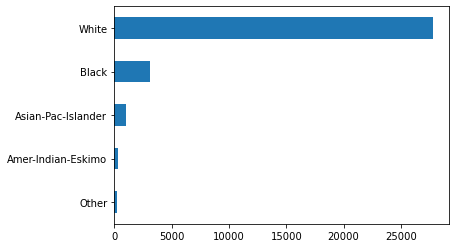

In [44]:
race_count.sort_values().plot.barh();

---
# What is the average age of men/women?
---

In [155]:
average_age_men = df[df.sex == 'Male'].age.mean()
average_age_men

39.43354749885268

In [156]:
round(average_age_men,1)

39.4

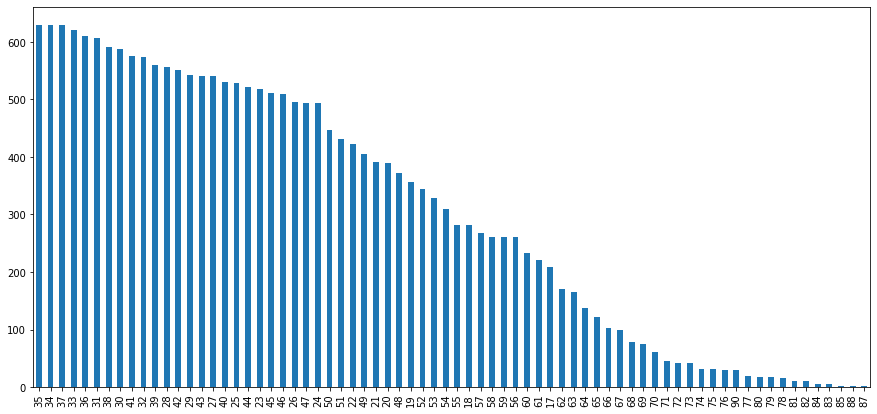

In [157]:
plt.figure(figsize = (15,7))
df.loc[df["sex"] == "Male", "age"].value_counts().plot.bar();

In [158]:
average_age_women = df[df.sex == 'Female'].age.mean()
average_age_women 

36.85823043357163

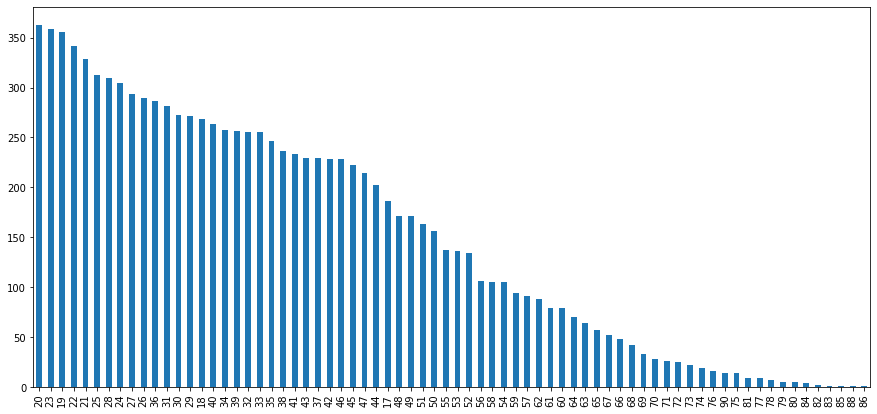

In [159]:
plt.figure(figsize = (15,7))
df.loc[df["sex"] == "Female", "age"].value_counts().plot.bar();

---
# What is the percentage of people who have a Bachelor's degree?
---

In [162]:
df.education.value_counts().sort_index()

10th              933
11th             1175
12th              433
1st-4th           168
5th-6th           333
7th-8th           646
9th               514
Assoc-acdm       1067
Assoc-voc        1382
Bachelors        5355
Doctorate         413
HS-grad         10501
Masters          1723
Preschool          51
Prof-school       576
Some-college     7291
Name: education, dtype: int64

In [57]:
df.education.value_counts()

HS-grad         10499
Some-college     7290
Bachelors        5353
Masters          1720
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       575
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [165]:
total_count = df['education'].count()

In [166]:
df.groupby('education').count().loc['Bachelors']/total_count

age               0.164461
workclass         0.164461
fnlwgt            0.164461
education-num     0.161144
marital-status    0.164461
occupation        0.164461
relationship      0.164461
race              0.164461
sex               0.164461
capital-gain      0.164461
capital-loss      0.164461
hours-per-week    0.164461
native-country    0.164461
salary            0.164461
Name: Bachelors, dtype: float64

In [58]:
upper =

lower =

percentage_bachelors = upper / lower * 100

percentage_bachelors

16.444963288378236

In [59]:
df["education"].value_counts(normalize=True)

HS-grad         0.322540
Some-college    0.223956
Bachelors       0.164450
Masters         0.052840
Assoc-voc       0.042456
11th            0.036097
Assoc-acdm      0.032779
10th            0.028663
7th-8th         0.019815
Prof-school     0.017665
9th             0.015791
12th            0.013302
Doctorate       0.012688
5th-6th         0.010230
1st-4th         0.005161
Preschool       0.001567
Name: education, dtype: float64

In [60]:
percentage_bachelors = df["education"].value_counts(normalize=True).loc["Bachelors"]*100
round(percentage_bachelors,1)

16.4

In [61]:
print(f"The percentage of people who have a Bachelor's degree : %{round(percentage_bachelors,1)}")

The percentage of people who have a Bachelor's degree : %16.4


---
# What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
---

In [167]:
higher_education = (df.education == 'Bachelors') |\
                   (df.education == 'Masters') |\
                   (df.education == 'Doctorate')
type(higher_education)

pandas.core.series.Series

In [169]:
df_high_edu = df[higher_education]
df_high_edu.sample(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
18650,23,Local-gov,336010,Bachelors,13.0,Never-married,Adm-clerical,Unmarried,White,Male,0,0,32,United-States,<=50K
27973,50,Private,548361,Bachelors,13.0,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,20,United-States,>50K
26752,38,Private,172538,Bachelors,13.0,Married-civ-spouse,Tech-support,Husband,White,Male,0,1977,40,United-States,>50K


In [171]:
df_high_edu.education.value_counts()

Bachelors    5355
Masters      1723
Doctorate     413
Name: education, dtype: int64

In [260]:
count = df_high_edu[df_high_edu['salary'] == '>50K'].count()
count

age               3486
workclass         3486
fnlwgt            3486
education         3486
education-num     3404
marital-status    3486
occupation        3486
relationship      3486
race              3486
sex               3486
capital-gain      3486
capital-loss      3486
hours-per-week    3486
native-country    3486
salary            3486
dtype: int64

In [261]:
perc_high_edu = count / len(df)
perc_high_edu

age               0.107061
workclass         0.107061
fnlwgt            0.107061
education         0.107061
education-num     0.104542
marital-status    0.107061
occupation        0.107061
relationship      0.107061
race              0.107061
sex               0.107061
capital-gain      0.107061
capital-loss      0.107061
hours-per-week    0.107061
native-country    0.107061
salary            0.107061
dtype: float64

In [180]:
higher_education

0         True
1         True
2        False
3        False
4         True
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: education, Length: 32561, dtype: bool

In [257]:
perc_high_edu

0.13374896348392248

In [258]:
print(f"Percentage of people with advanced education make more than 50K : {round(perc_high_edu * 100, 2)}")

Percentage of people with advanced education make more than 50K : 13.37


---
# What percentage of people without advanced education make more than 50K?
---

In [182]:
lower_education = ~higher_education
lower_education

0        False
1        False
2         True
3         True
4        False
         ...  
32556     True
32557     True
32558     True
32559     True
32560     True
Name: education, Length: 32561, dtype: bool

In [183]:
df_low_edu = df[lower_education]
df_low_edu.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Unmarried,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5.0,Married-spouse-absent,Other-service,Unmarried,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
10,37,Private,280464,Some-college,10.0,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
7,52,Self-emp-not-inc,209642,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
10,37,Private,280464,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
14,40,Private,121772,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,Unknown,>50K
27,54,Unknown,180211,Some-college,Married-civ-spouse,Unknown,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,Unknown,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32518,57,Local-gov,110417,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,>50K
32519,46,Private,364548,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,>50K
32545,39,Local-gov,111499,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [199]:
count = df_low_edu[df_low_edu.salary == '>50K'].count()['education']

In [200]:
count

4355

In [201]:
perc_low_edu = count / len(df)
perc_low_edu

0.13374896348392248

In [202]:
print(f"Percentage of people without advanced education make more than 50K : {round(perc_low_edu * 100 ,2)}")

Percentage of people without advanced education make more than 50K : 13.37


In [259]:
if perc_high_edu > perc_low_edu :
    print("More education more money!")
else:
    print("Education has no clear effet on salary. You should investigate some other features also.")

Education has no clear effet on salary. You should investigate some other features also.


---
# What percentage of the people who work the minimum number of hours per week have a salary of >50K?
---

In [204]:
df['hours-per-week'].value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
92        1
87        1
74        1
94        1
Name: hours-per-week, Length: 94, dtype: int64

In [211]:
lazy_riches = (df['hours-per-week'] == df['hours-per-week'].min() & (df.salary=='>50K'))
lazy_riches

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32561, dtype: bool

In [212]:
df[lazy_riches]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
189,58,State-gov,109567,Doctorate,16.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,United-States,>50K
20072,65,?,76043,HS-grad,9.0,Married-civ-spouse,?,Husband,White,Male,0,0,1,United-States,>50K


In [213]:
num_lazy_riches = len(df[lazy_riches])
num_lazy_riches

2

In [214]:
df['hours-per-week'].min()

1

In [215]:
num_min_workers = len(df[df['hours-per-week'].min() == df['hours-per-week']])
num_min_workers

20

In [216]:
print (f"Percentage of the people who work the minimum number of hours per week have a salary of >50K : % {round(num_lazy_riches/num_min_workers*100)}")

Percentage of the people who work the minimum number of hours per week have a salary of >50K : % 10


 ---
 # What country has the highest percentage of people that earn >50K?
 ---


In [221]:
country_salary_df = df[.groupby('native-country')[['salary']].count()]
country_salary_df

,salary
native-country,
?,146
Cambodia,7
Canada,39
China,20
Columbia,2
Cuba,25
Dominican-Republic,2
Ecuador,4
El-Salvador,9


In [222]:
country_salary_df_riches = df[df.salary == '>50K'].groupby('native-country')[['salary']].count()
country_salary_df_riches

,salary
native-country,
?,146
Cambodia,7
Canada,39
China,20
Columbia,2
Cuba,25
Dominican-Republic,2
Ecuador,4
El-Salvador,9


In [241]:
rich_per_country = (country_salary_df_riches/country_salary_df).sort_values('salary').value_counts()
rich_per_country

salary
1.0       40
dtype: int64

In [223]:
country_salary_df_riches.loc['Iran'][0]

18

In [237]:
#use iloc here
country_salary_df_riches.iloc[]

salary    6
Name: Yugoslavia, dtype: int64

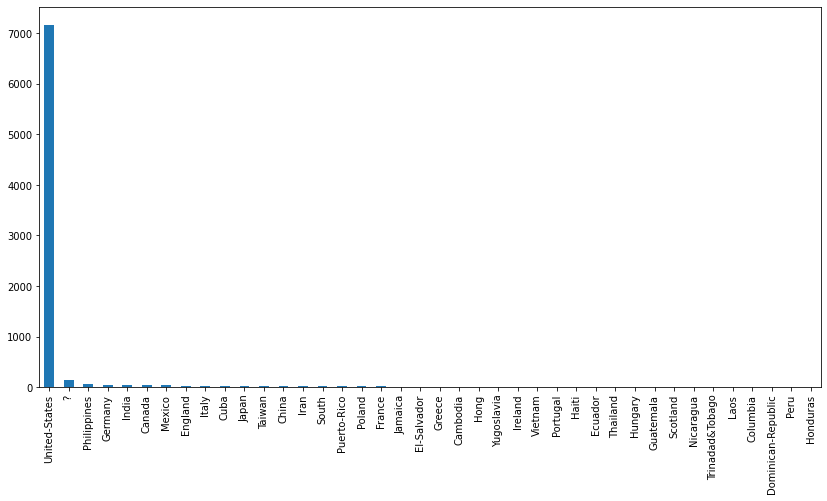

In [226]:
plt.figure(figsize=(14,7))
df.loc[df["salary"] == ">50K", "native-country"].value_counts().plot(kind="bar");

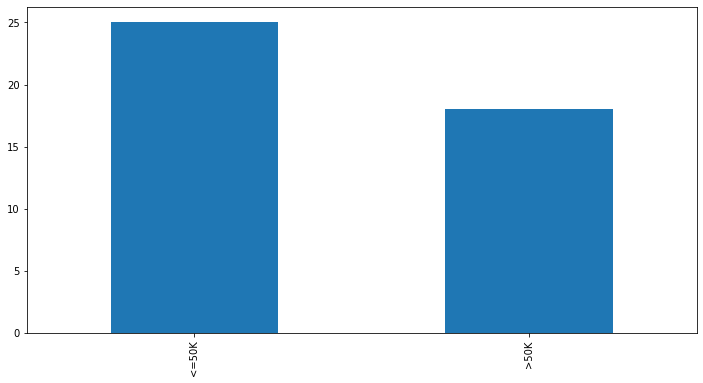

In [227]:
plt.figure(figsize=(12,6))
df.loc[((df["native-country"] == "Iran")), "salary"].value_counts().plot.bar();

---
# Identify the most popular occupation for those who earn >50K in India.
---

In [243]:
top_IN_occupation = (df['native-country'] == 'India') & (df.salary == '>50K')

top_IN_occupation

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32561, dtype: bool

In [244]:
df[top_IN_occupation]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
11,30,State-gov,141297,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
968,48,Private,164966,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
1327,52,Private,168381,HS-grad,9.0,Widowed,Other-service,Unmarried,Asian-Pac-Islander,Female,0,0,40,India,>50K
7258,42,State-gov,102343,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,72,India,>50K
7285,54,State-gov,93449,Masters,14.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
8124,36,Private,172104,Prof-school,15.0,Never-married,Prof-specialty,Unmarried,Other,Male,0,0,40,India,>50K
9939,43,Federal-gov,325706,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,50,India,>50K
10590,35,Private,98283,Prof-school,15.0,Never-married,Prof-specialty,Unmarried,Asian-Pac-Islander,Male,0,0,40,India,>50K
10661,59,Private,122283,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,99999,0,40,India,>50K
10736,30,Private,243190,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,20,India,>50K


In [245]:
df[top_IN_occupation]['occupation'].value_counts()

Prof-specialty      25
Exec-managerial      8
Other-service        2
Tech-support         2
Transport-moving     1
Sales                1
Adm-clerical         1
Name: occupation, dtype: int64

In [249]:
df[top_IN_occupation]['occupation'].value_counts().index[0]

'Prof-specialty'

In [250]:
a = df[top_IN_occupation].occupation.mode()[0]     #use mode here
a 

'Prof-specialty'

In [252]:
d = {'50+': '>50K', '50-': '<50K'}
profs_hi = ['Masters', 'Doctorate']

In [253]:
print(f"{a} the most popular occupation for those who earn >50K in India.")

Prof-specialty the most popular occupation for those who earn >50K in India.


----
---